In [1]:
import probe_lm
from probe_lm import data_utils
from probe_lm import plotting_utils, metrics

import matplotlib.pyplot as plt
#plt.style.use('dark_background') # for viewing in notebook
plt.style.use('default') # for production of plots for paper/quip

%load_ext autoreload
%autoreload 2
from transformers import GPT2Model, GPT2Config
from transformers import GPT2Tokenizer
from transformers import GPT2LMHeadModel
from tabulate import tabulate

import numpy as np
import pickle

import seaborn as sns
sns.set_theme()

import pandas as pd
from transformers import AutoTokenizer, AutoModelForCausalLM
from probe_lm import data_utils, normalize_dict, plotting_utils, compute_metrics


/Users/schwobel/anaconda3/envs/renate_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# matplotlib settings
plt.rcParams.update({'font.size': 24})
plt.rc('axes', titlesize=24, labelsize=18)
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=18)

### Prompts and ground truth

In [3]:
# read list of basic prompts to extend automatically
basic_prompts = data_utils.read_prompts("../data/population-prompts-automatic.txt")
extended_prompts = data_utils.extend_prompt_list(basic_prompts)
# run this twice in order to produce all combinations of pronouns + relations
extended_prompts = data_utils.extend_prompt_list(extended_prompts)

ground_truth_file = "../data/english-speaking-population-data.txt"
ground_truth_unnormalised = data_utils.read_population_data(ground_truth_file)
ground_truth = probe_lm.normalize_dict(ground_truth_unnormalised)

len(basic_prompts), len(extended_prompts)

(64, 955)

In [5]:
# all predictions
with open('../results/results_disambiguated_paper/geography_prompt_predictions_gpt2.p', 'rb') as file:
    all_predictions_gpt2small = pickle.load(file) # already normalised
with open('../results/results_disambiguated_paper/geography_prompt_predictions_gpt2-medium.p', 'rb') as file:
    all_predictions_gpt2medium = pickle.load(file) # already normalised
with open('../results/results_disambiguated_paper/geography_prompt_predictions_gpt2-large.p', 'rb') as file:
    all_predictions_gpt2large = pickle.load(file) # already normalised
with open('../results/results_disambiguated_paper/geography_prompt_predictions_gpt2-xl.p', 'rb') as file:
     all_predictions_gpt2xl = pickle.load(file) # already normalised
with open('../results/results_disambiguated_paper/geography_prompt_predictions_gpt-neo-125M.p', 'rb') as file:
    all_predictions_gptneosmall = pickle.load(file) # already normalised
with open('../results/results_disambiguated_paper/geography_prompt_predictions_gpt-neo-1.3B.p', 'rb') as file:
    all_predictions_gptneomedium = pickle.load(file) # already normalised
with open('../results/results_disambiguated_paper/geography_prompt_predictions_gpt-neo-2.7B.p', 'rb') as file:
    all_predictions_gptneolarge = pickle.load(file) # already normalised
with open('../results/results_disambiguated_paper/geography_prompt_predictions_gpt-neox-20b.p', 'rb') as file:
    all_predictions_gptneoxl = pickle.load(file) # already normalised
with open('../results/results_disambiguated_paper/geography_prompt_predictions_open_llama_3b.p', 'rb') as file:
    all_predictions_llama3b = pickle.load(file) # already normalised
with open('../results/results_disambiguated_paper/geography_prompt_predictions_open_llama_7b.p', 'rb') as file:
    all_predictions_llama7b = pickle.load(file) # already normalised
     
# aggregated predictions
with open('../results/results_disambiguated_paper/geography_aggregated_predictions_gpt2.p', 'rb') as file:
    aggregated_predictions_gpt2small = pickle.load(file) # already normalised
with open('../results/results_disambiguated_paper/geography_aggregated_predictions_gpt2-medium.p', 'rb') as file:
    aggregated_predictions_gpt2medium = pickle.load(file) # already normalised
with open('../results/results_disambiguated_paper/geography_aggregated_predictions_gpt2-large.p', 'rb') as file:
    aggregated_predictions_gpt2large = pickle.load(file) # already normalised
with open('../results/results_disambiguated_paper/geography_aggregated_predictions_gpt2-xl.p', 'rb') as file:
    aggregated_predictions_gpt2xl = pickle.load(file) # already normalised
with open('../results/results_disambiguated_paper/geography_aggregated_predictions_gpt-neo-125M.p', 'rb') as file:
    aggregated_predictions_gptneosmall = pickle.load(file) # already normalised
with open('../results/results_disambiguated_paper/geography_aggregated_predictions_gpt-neo-1.3B.p', 'rb') as file:
    aggregated_predictions_gptneomedium = pickle.load(file) # already normalised
with open('../results/results_disambiguated_paper/geography_aggregated_predictions_gpt-neo-2.7B.p', 'rb') as file:
    aggregated_predictions_gptneolarge = pickle.load(file) # already normalised
with open('../results/results_disambiguated_paper/geography_aggregated_predictions_gpt-neox-20b.p', 'rb') as file:
    aggregated_predictions_gptneox= pickle.load(file) # already normalised
with open('../results/results_disambiguated_paper/geography_aggregated_predictions_open_llama_3b.p', 'rb') as file:
    aggregated_predictions_llama3b = pickle.load(file) # already normalised
with open('../results/results_disambiguated_paper/geography_aggregated_predictions_open_llama_7b.p', 'rb') as file:
    aggregated_predictions_llama7b = pickle.load(file) # already normalised

In [192]:
extended_prompts.index('I live in')

369

In [212]:
all_predictions_gpt2small[369]['Canada'] / all_predictions_gpt2small[369]['Pakistan']

9.41644787482473

In [211]:
ground_truth_unnormalised['Pakistan'] / ground_truth_unnormalised['Canada'] 

3.774339246901733

In [209]:
all_predictions_gpt2xl[369]['Pakistan'], all_predictions_gpt2xl[369]['India']

(0.0050768153377934114, 0.02825298020189571)

### Erasure sets for aggregated predictions

In [160]:
aggregated_gpt2small =  metrics.compute_metrics([aggregated_predictions_gpt2small], ground_truth, use_erasure_set=True, r=3)[1][0].keys()
aggregated_gpt2medium =  metrics.compute_metrics([aggregated_predictions_gpt2medium], ground_truth, use_erasure_set=True, r=3)[1][0].keys()
aggregated_gpt2large =  metrics.compute_metrics([aggregated_predictions_gpt2large], ground_truth, use_erasure_set=True, r=3)[1][0].keys()
aggregated_gpt2xl =  metrics.compute_metrics([aggregated_predictions_gpt2xl], ground_truth, use_erasure_set=True, r=3)[1][0].keys()

aggregated_gptneosmall =  metrics.compute_metrics([aggregated_predictions_gptneosmall], ground_truth, use_erasure_set=True, r=3)[1][0].keys()
aggregated_gptneomedium =  metrics.compute_metrics([aggregated_predictions_gptneomedium], ground_truth, use_erasure_set=True, r=3)[1][0].keys()
aggregated_gptneolarge =  metrics.compute_metrics([aggregated_predictions_gptneolarge], ground_truth, use_erasure_set=True, r=3)[1][0].keys()
aggregated_gptneox =  metrics.compute_metrics([aggregated_predictions_gptneox], ground_truth, use_erasure_set=True, r=3)[1][0].keys()

aggregated_llama3b =  metrics.compute_metrics([aggregated_predictions_llama3b], ground_truth, use_erasure_set=True, r=3)[1][0].keys()
aggregated_llama7b =  metrics.compute_metrics([aggregated_predictions_llama7b], ground_truth, use_erasure_set=True, r=3)[1][0].keys()

In [161]:
all_erasure_sets = [aggregated_gpt2small, aggregated_gpt2medium, aggregated_gpt2large, aggregated_gpt2xl, aggregated_gptneosmall, aggregated_gptneomedium, aggregated_gptneolarge,
                    aggregated_gptneox, aggregated_llama3b, aggregated_llama7b]

In [162]:
erased_by_how_many = {c:0 for c in ground_truth.keys()}
for country in ground_truth.keys():
    for erasure_set in all_erasure_sets:
        if country in erasure_set:
            erased_by_how_many[country] += 1

In [163]:
erasure_hist_vals = np.array(list(erased_by_how_many.values()))

In [164]:
sum(erasure_hist_vals > 0)

22

(array([105.,   5.,   3.,   1.,   2.,   0.,   3.,   2.,   1.,   5.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

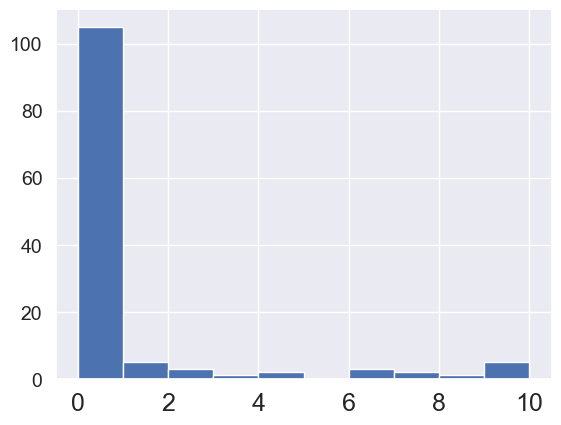

In [165]:
plt.hist(erasure_hist_vals)

In [167]:
erased_by_some = {key:val for key,val in erased_by_how_many.items() if val > 0}
erased_by_some

{'Pakistan': 10,
 'Nigeria': 10,
 'the Philippines': 7,
 'Uganda': 10,
 'Bangladesh': 2,
 'Malaysia': 2,
 'Sri Lanka': 6,
 'Iraq': 1,
 'Cameroon': 4,
 'Sierra Leone': 1,
 'Madagascar': 10,
 'Papua New Guinea': 3,
 'Eswatini': 10,
 'Suriname': 1,
 'Solomon Islands': 7,
 'Saint Vincent and the Grenadines': 6,
 'Saint Lucia': 1,
 'the Northern Mariana Islands': 6,
 'Antigua and Barbuda': 1,
 'the Federated States of Micronesia': 4,
 'Marshall Islands': 8,
 'Saint Kitts and Nevis': 2}

In [170]:
def make_histogram(erased_by_some, path=None):
    countries = list(erased_by_some.keys())
    # rename for plotting purposes
    for i, country in enumerate(countries):
        if countries[i] == 'the Federated States of Micronesia':
            countries[i] = 'Micronesia'
        if countries[i] == 'Saint Vincent and the Grenadines':
            countries[i] = 'St Vincent & the Grenadines'
    erase_counts = erased_by_some.values()
    alpha=[val/10 for val in erase_counts]

    fig, ax = plt.subplots(1, figsize=(10, 5))
    alphas = [val/10 for val in erase_counts]
    x = list(range(len(countries)))
    ax.bar(x=x, height=erase_counts, color='darkred')
    ax.set_xticks(x)
    ax.set_xticklabels(countries, rotation=90);
    ax.set_ylabel('Erased by how many models')

    for bar, alpha in zip(ax.containers[0], alphas):
        bar.set_alpha(alpha)
    if path is not None: 
        plt.savefig(path, bbox_inches='tight')

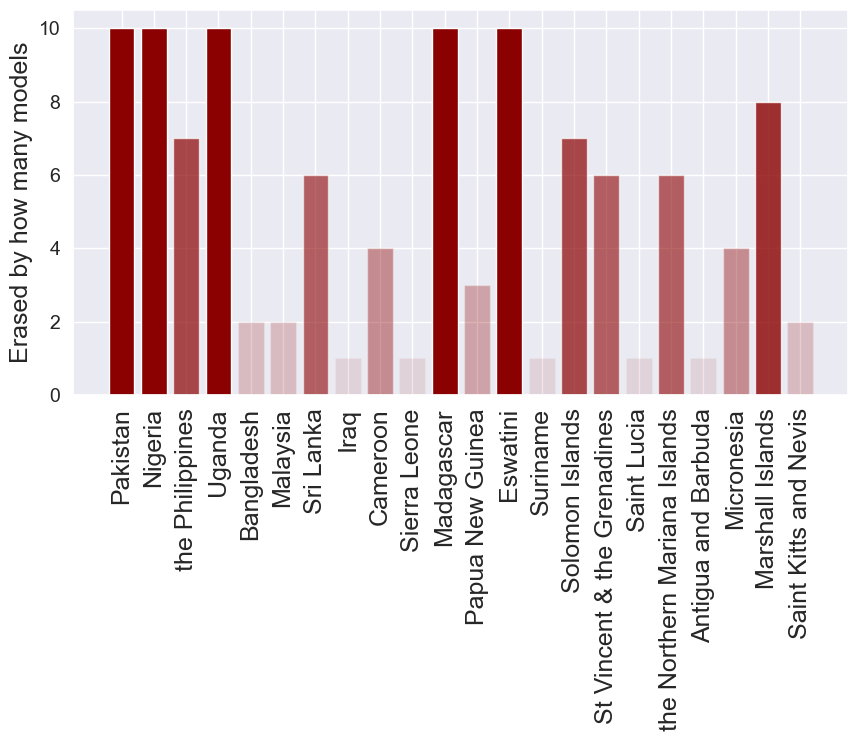

In [171]:
# no particular ordering
make_histogram(erased_by_some)

### Compare to GDP

In [172]:
gdp_file = "../data/gdp-data.txt"
gdp_data = data_utils.read_population_data(gdp_file)
gdp_data['the Federated States of Micronesia'] = 4336

In [173]:
gdp_data_sorted = dict(sorted(gdp_data.items(), key=lambda x:x[1], reverse=True))
erased_sorted_by_gdp = {key: erased_by_some[key] for key in gdp_data_sorted if key in erased_by_some}
erased_sorted_by_gdp

{'Nigeria': 10,
 'Malaysia': 2,
 'the Philippines': 7,
 'Bangladesh': 2,
 'Pakistan': 10,
 'Iraq': 1,
 'Sri Lanka': 6,
 'Uganda': 10,
 'Cameroon': 4,
 'Papua New Guinea': 3,
 'Madagascar': 10,
 'Eswatini': 10,
 'the Federated States of Micronesia': 4,
 'Sierra Leone': 1,
 'Suriname': 1,
 'Saint Lucia': 1,
 'Antigua and Barbuda': 1,
 'Solomon Islands': 7,
 'the Northern Mariana Islands': 6,
 'Saint Kitts and Nevis': 2,
 'Saint Vincent and the Grenadines': 6,
 'Marshall Islands': 8}

## Plot sorted by GDP:

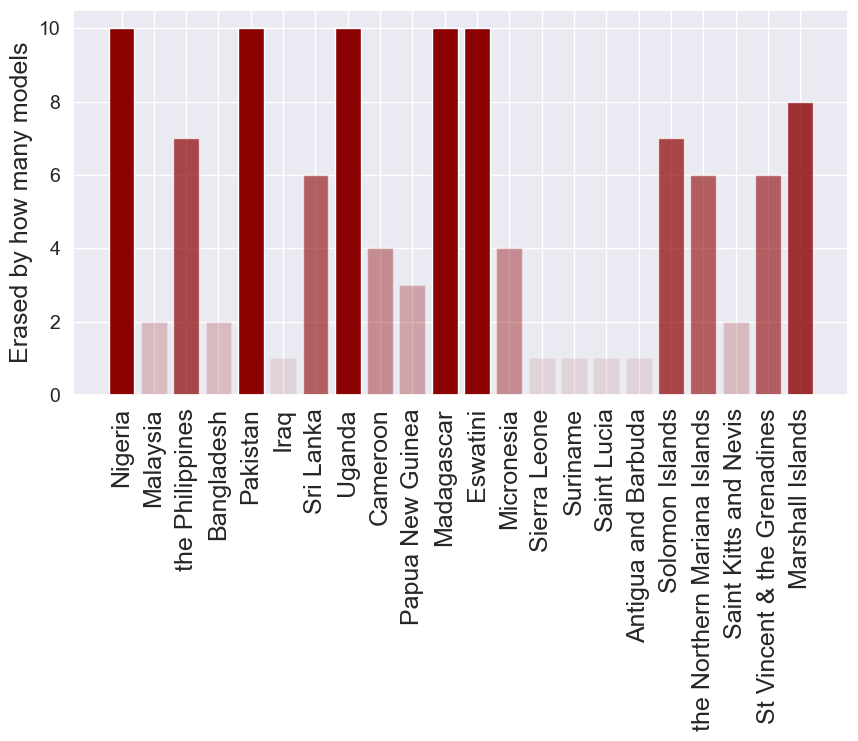

In [174]:
make_histogram(erased_sorted_by_gdp)

## What about normalised gdp?

We compute normalised GDP as follows: gdp_data[key] / world_pop_unnormalised[key]. For example: 

In [175]:
world_pop_file = "../data/world-population.txt"
world_pop_unnormalised = data_utils.read_population_data(world_pop_file)

In [176]:
# check
key = 'the United States'
gdp_data[key] / world_pop_unnormalised[key]

0.08113106924935172

In [180]:
gdp_data_normed = {key: gdp_data[key] / world_pop_unnormalised[key] for key in gdp_data if key in world_pop_unnormalised}
gdp_data_normed['the Northern Mariana Islands'] = 23707
gdp_data_normed = dict(sorted(gdp_data_normed.items(), key=lambda x:x[1], reverse=True))
erased_sorted_by_normed_gdp = {key: erased_by_some[key] for key in gdp_data_normed if key in erased_by_some}

In [181]:
set(erased_by_some.keys()) - set(gdp_data_normed.keys())

set()

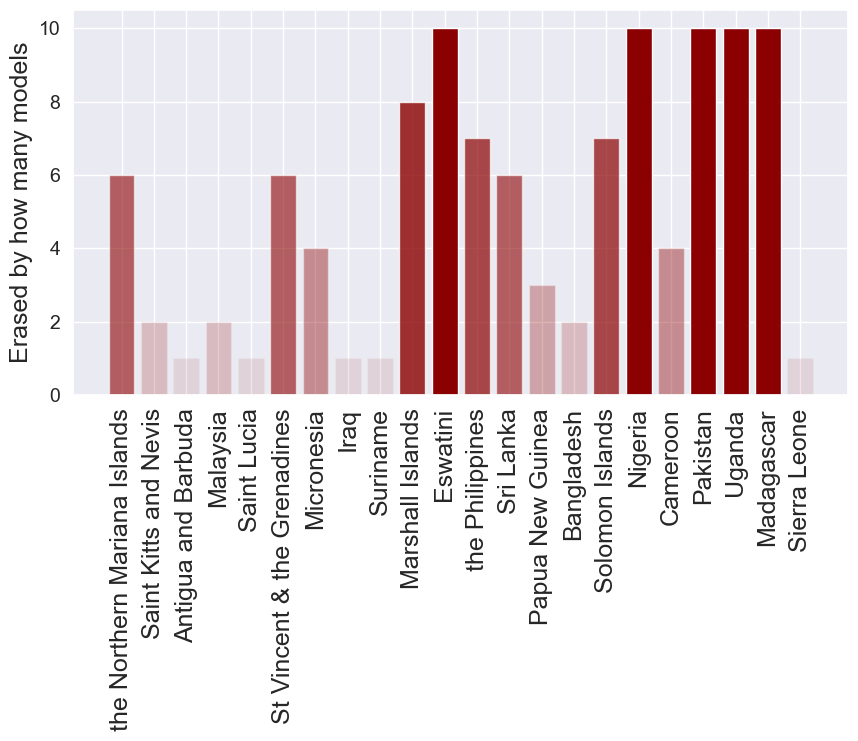

In [182]:
make_histogram(erased_sorted_by_normed_gdp, path='images/erasure_who/histo_by_normalised_gdp.pdf')

In [183]:
gdp_data_normed_erased = {key: gdp_data_normed[key] for key in gdp_data_normed if key in erased_by_some}
gdp_data_normed_erased

{'the Northern Mariana Islands': 23707,
 'Saint Kitts and Nevis': 0.019774807797139044,
 'Antigua and Barbuda': 0.01903419824566778,
 'Malaysia': 0.013811592838521684,
 'Saint Lucia': 0.012318449901158327,
 'Saint Vincent and the Grenadines': 0.009365422751036596,
 'the Federated States of Micronesia': 0.007899233759751071,
 'Iraq': 0.006660278367131545,
 'Suriname': 0.005915122257224291,
 'Marshall Islands': 0.0049163710086163204,
 'Eswatini': 0.004158032829841298,
 'the Philippines': 0.004023513986602687,
 'Sri Lanka': 0.0035163276717139003,
 'Papua New Guinea': 0.0035052996392990563,
 'Bangladesh': 0.0025533886419381387,
 'Solomon Islands': 0.002476400673184992,
 'Nigeria': 0.0024575628701772566,
 'Cameroon': 0.0018317355137408794,
 'Pakistan': 0.0017044185416298274,
 'Uganda': 0.0010885637038992168,
 'Madagascar': 0.0005766851908441936,
 'Sierra Leone': 0.00044126958776269175}

In [184]:
gdp_data_normed_not_erased = {key: gdp_data_normed[key] for key in gdp_data_normed if key not in erased_by_some}
gdp_data_normed_not_erased

{'Luxembourg': 0.13893619264574794,
 'Ireland': 0.12031606878062354,
 'Norway': 0.10220999214017602,
 'Switzerland': 0.10047821845945439,
 'the United States': 0.08113106924935172,
 'Denmark': 0.07002967092653191,
 'Australia': 0.06696297128253603,
 'Netherlands': 0.06308071633100032,
 'Israel': 0.06229805552169797,
 'Sweden': 0.05931639579711989,
 'Austria': 0.05720366788143273,
 'Canada': 0.05536705721671317,
 'Finland': 0.05444599257858185,
 'Belgium': 0.053862666628586624,
 'New Zealand': 0.052251519161351186,
 'Germany': 0.05142816030308051,
 'Andorra': 0.04748592506309454,
 'the United Kingdom': 0.046532974223511235,
 'France': 0.04478829091942059,
 'Malta': 0.04394815453987494,
 'Brunei': 0.036545754196201416,
 'Bahamas': 0.03589120240868265,
 'Italy': 0.0358861970195872,
 'Japan': 0.03486607677929888,
 'Slovenia': 0.03276095775824003,
 'Spain': 0.031920416775372135,
 'Estonia': 0.03132295793175453,
 'Lithuania': 0.028779457287598783,
 'Portugal': 0.02625562816394976,
 'Cyprus':

(array([9., 5., 1., 2., 4.]),
 array([0.00071837, 0.00694652, 0.01317468, 0.01940284, 0.025631  ,
        0.03185915]),
 <BarContainer object of 5 artists>)

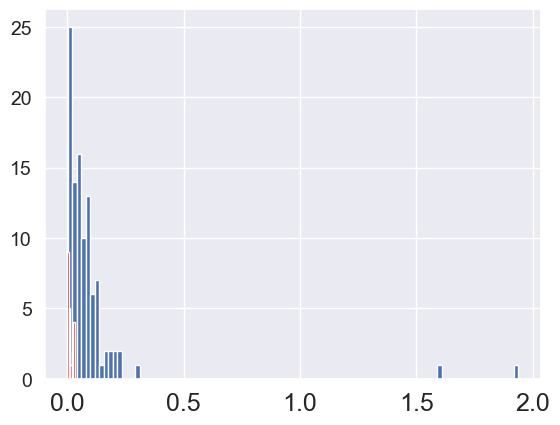

In [54]:
fig, ax = plt.subplots(1)
ax.hist(gdp_data_normed_not_erased.values(), bins=100)
ax.hist(gdp_data_normed_erased.values(), bins=5, color='red')

In [185]:
np.median(list(gdp_data_normed_not_erased.values()))

0.01487554891468157

In [186]:
np.median(list(gdp_data_normed_erased.values()))

0.0040907734082219925